In [1]:
working_dir = "../data/"
%cd $working_dir

/home/ander/Projects/adatos-ta/data


In [2]:
!pwd

/home/ander/Projects/adatos-ta/data


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadstat

In [5]:
df = pd.read_csv("datos_post_step4a_scaled_no_dummies.csv")
df.head(5)

,tipo_persona,tipo_contribuyente,clase_vehiculo,categoria_vehiculo,marca_agrupada,distrito_fiscal_agrupado,porcentaje_propiedad_cat,valor_adquisicion_scaled,valor_referencial_scaled,anios_desde_inscripcion_scaled
0,natural,pequeno,camioneta,b1234_pickup_otros,FORD,OTROS,propietario_total,0.791119,0.817195,0.5
1,natural,pequeno,camioneta,b1234_pickup_otros,CHEVROLET,OTROS,propietario_total,-0.618776,-0.541252,-0.5
2,natural,pequeno,camioneta,b1234_pickup_otros,OTROS,OTROS,propietario_total,0.867780,0.928145,0.0
3,soc_conyugal,pequeno,automovil,a2_1051_1500cc,HYUNDAI,OTROS,propietario_total,-0.481942,-0.800322,0.5
4,natural,pequeno,camioneta,b1234_pickup_otros,JETOUR,OTROS,propietario_total,-0.478479,-0.154281,0.0


In [6]:
df.dtypes

tipo_persona                       object
tipo_contribuyente                 object
clase_vehiculo                     object
categoria_vehiculo                 object
marca_agrupada                     object
distrito_fiscal_agrupado           object
porcentaje_propiedad_cat           object
valor_adquisicion_scaled          float64
valor_referencial_scaled          float64
anios_desde_inscripcion_scaled    float64
dtype: object

In [8]:
df.describe()

,valor_adquisicion_scaled,valor_referencial_scaled,anios_desde_inscripcion_scaled
count,247816.000000,247816.000000,247816.000000
mean,0.081456,0.157913,-0.004370
std,1.247004,0.825452,0.400584
min,-15.267415,-4.533988,-0.500000
25%,-0.441097,-0.435798,-0.500000
50%,0.000000,0.000000,0.000000
75%,0.558903,0.564202,0.500000
max,6.175663,4.301016,0.500000


In [9]:
from kmodes.kprototypes import KPrototypes

modelo1 = KPrototypes(random_state=2025, init='random', n_jobs=-1) 

In [10]:
categorical_columns_pos = [df.columns.get_loc(col) for col in list(df.select_dtypes(include=['object', 'category']).columns)]
categorical_columns_pos

[0, 1, 2, 3, 4, 5, 6]

In [11]:
df_sample = df.sample(10000, random_state=2025)
df_sample_matrix = df_sample.to_numpy()
df_sample_matrix

array([['natural', 'pequeno', 'camioneta', ..., -0.4814943369981709,
        -0.3345118703114144, -0.5],
       ['natural', 'pequeno', 'camioneta', ..., -0.5078667437137044,
        -0.8801579875715138, 0.0],
       ['juridica', 'grande', 'camioneta', ..., -0.3595283830021332,
        -0.1777728967338738, 0.0],
       ...,
       ['soc_conyugal', 'pequeno', 'camioneta', ..., 0.1068512095506382,
        -0.142011812045517, 0.0],
       ['juridica', 'grande', 'automovil', ..., -0.7168711284017487,
        -0.5179724591757848, -0.5],
       ['natural', 'pequeno', 'automovil', ..., -0.721779090282996,
        -0.5545140652360658, 0.5]], shape=(10000, 10), dtype=object)

In [12]:
cost = []
for cluster in range(1, 11):
    try:
        kprototype = KPrototypes(n_clusters=cluster, max_iter=30, n_init=5, random_state=2025, init='random', n_jobs=-1)
        kprototype.fit_predict(df_sample_matrix, categorical=categorical_columns_pos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except Exception as e:
        print(f"Error en cluster {cluster}: {e}")
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10


In [13]:
df_cost = pd.DataFrame({'Cluster':range(1, 11), 'Cost':cost})
df_cost

,Cluster,Cost
0,1,34449.767258
1,2,25794.696829
2,3,21098.508517
3,4,17908.963417
4,5,16376.343201
5,6,15164.242651
6,7,14399.739906
7,8,13693.475607
8,9,13576.047110
9,10,12732.723950


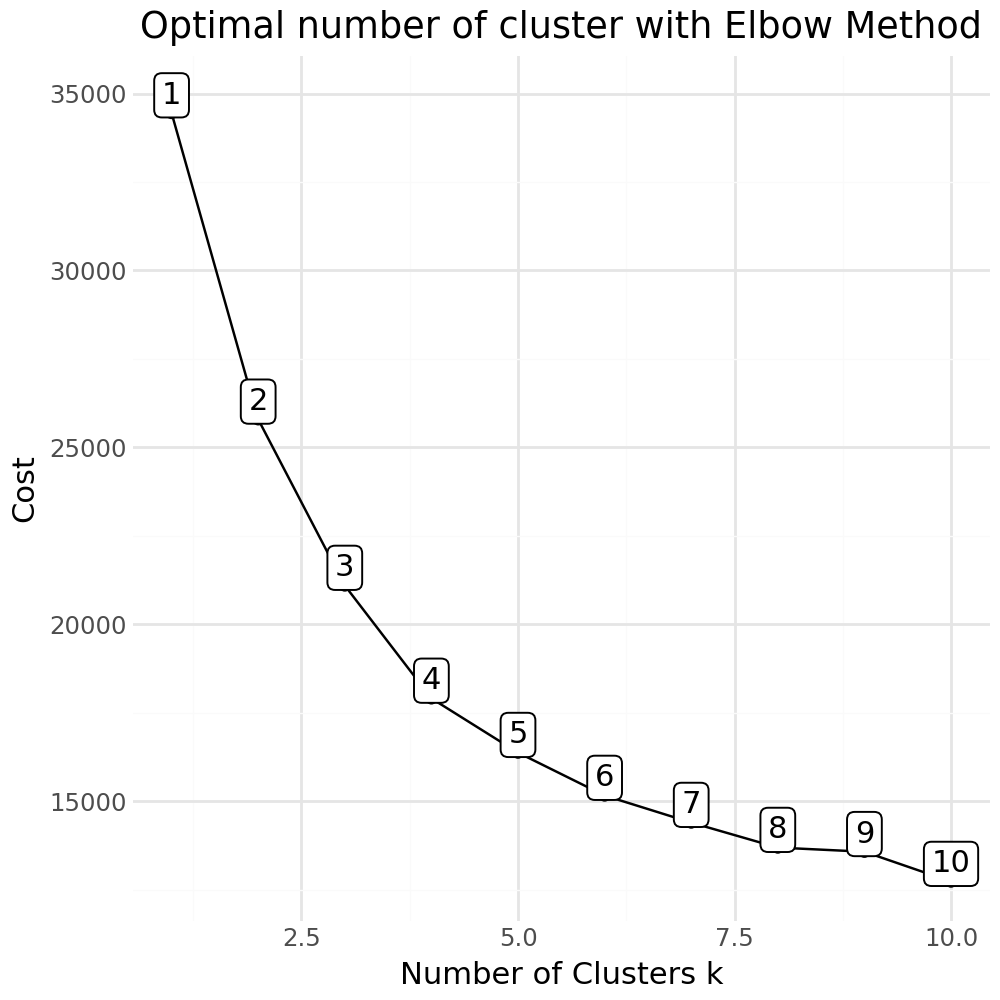

In [14]:
from plotnine import *
import plotnine

plotnine.options.figure_size = (5, 5)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 11,
               nudge_y = 500) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    #xlim(0, 11.5) +
    #ylim(230, 500) +
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [15]:
# Selecciona una muestra del DataFrame original
df_sample = df.sample(100000, random_state=2025)

# Convierte la muestra a matriz numpy
df_sample_matrix = df_sample.to_numpy()
print(df_sample_matrix)

[['natural' 'pequeno' 'camioneta' ... -0.4814943369981709
  -0.3345118703114144 -0.5]
 ['natural' 'pequeno' 'camioneta' ... -0.5078667437137044
  -0.8801579875715138 0.0]
 ['juridica' 'grande' 'camioneta' ... -0.3595283830021332
  -0.1777728967338738 0.0]
 ...
 ['soc_conyugal' 'pequeno' 'automovil' ... -0.6465377820411823
  -0.7936609728823493 0.5]
 ['natural' 'pequeno' 'tracto_camion_remolcador' ... 2.101013095696273
  1.9956672762255785 0.5]
 ['natural' 'grande' 'camioneta' ... 0.4161695239637505
  0.6816352929125619 0.0]]


In [16]:
modelo1 = KPrototypes(n_clusters = 5, max_iter= 25, n_init= 3, random_state = 2025, init = 'Huang', n_jobs = -1, verbose=1)
modelo1.fit_predict(df_sample_matrix, categorical = categorical_columns_pos)

Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Run: 1, iteration: 1/25, moves: 16642, ncost: 171310.71355509816
Run: 3, iteration: 1/25, moves: 27227, ncost: 176413.4043561232
Run: 2, iteration: 1/25, moves: 41678, ncost: 188335.43213025987
Run: 1, iteration: 2/25, moves: 2530, ncost: 170978.63574947577
Run: 3, iteration: 2/25, moves: 14418, ncost: 168819.64785808875
Run: 2, iteration: 2/25, moves: 10655, ncost: 173138.0337323689
Run: 1, iteration: 3/25, moves: 833, ncost: 170971.6291975871
Run: 3, iteration: 3/25, moves: 2581, ncost: 167476.73852088358
Run: 2, iteration: 3/25, moves: 3258, ncost: 169787.54275348346
Run: 1, iteration: 4/25, moves: 261, ncost: 170970.90496059795
Run: 3, iteration: 4/25, moves: 621, ncost: 167426.57049459845
Run: 2, iteration: 4/25, moves: 1318, ncost: 169652.87517

array([2, 2, 0, ..., 2, 3, 1], shape=(100000,), dtype=uint16)

In [17]:
modelo1.cluster_centroids_

array([['-0.18178834511118186', '-0.14836584718093673',
        '-0.13936115404430705', 'juridica', 'grande', 'camioneta',
        'b1234_pickup_otros', 'KIA', 'SAN ISIDRO', 'propietario_total'],
       ['0.6110319280498567', '0.5903251430451895',
        '0.008831708584176267', 'natural', 'pequeno', 'camioneta',
        'b1234_pickup_otros', 'TOYOTA', 'SANTIAGO DE SURCO',
        'propietario_total'],
       ['-0.5178817644738495', '-0.45270523043174715',
        '0.0708197716114084', 'natural', 'pequeno', 'camioneta',
        'b1234_pickup_otros', 'OTROS', 'SANTIAGO DE SURCO',
        'propietario_total'],
       ['2.273589497758734', '2.230645323912491',
        '-0.029407751091703058', 'juridica', 'pequeno', 'camion',
        'c1_camiones', 'OTROS', 'SAN ISIDRO', 'propietario_total'],
       ['-12.777784111754602', '0.1123323591906729',
        '0.2543424317617866', 'natural', 'pequeno', 'camioneta',
        'b1234_pickup_otros', 'TOYOTA', 'SAN ISIDRO',
        'propietario_total']

In [18]:
modelo1.n_iter_

9

In [19]:
modelo1.cost_

np.float64(167425.971494603)

In [20]:
df_sample['Cluster_modelo1'] = modelo1.labels_
df_sample['Cluster_modelo1']

38912     2
201215    2
187167    0
176194    2
207918    1
         ..
4992      0
133243    1
113599    2
8460      3
190954    1
Name: Cluster_modelo1, Length: 100000, dtype: uint16

In [21]:
df_sample['Cluster_modelo1'].value_counts()

Cluster_modelo1
2    36254
1    32723
0    23292
3     7328
4      403
Name: count, dtype: int64